## Lyapunov exponent

The Lyapunov exponent indicates how rapidly a complex system approaches deterministic chaos. Usually, the largest value of the exponent is of interest, known as the maximum Lyapunov exponent (MLE). For a time discrete system $x_{t+1}=f(x_{t})$ it is defined as:

$$\lambda (x_{0}) = \lim_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \ln |f'(x_{i})|$$

The logistic map is often cited as an archetypal example of how complex, chaotic behaviour can arise from very simple non-linear equations. It is given by: 

$$x_{n+1} = r \cdot x_{n}(1 - x_{n})$$

Here, we explore the influence of growth rate in this chaotic behavior.

### Import Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

### Setup

In [2]:
sys.path.append('../src/')
from bifurcations import growth_rate

### Visualize

CPU times: user 1min 54s, sys: 1.06 s, total: 1min 55s
Wall time: 1min 57s


Text(0.5, 0.98, 'Logistic map and Lyapunov exponent')

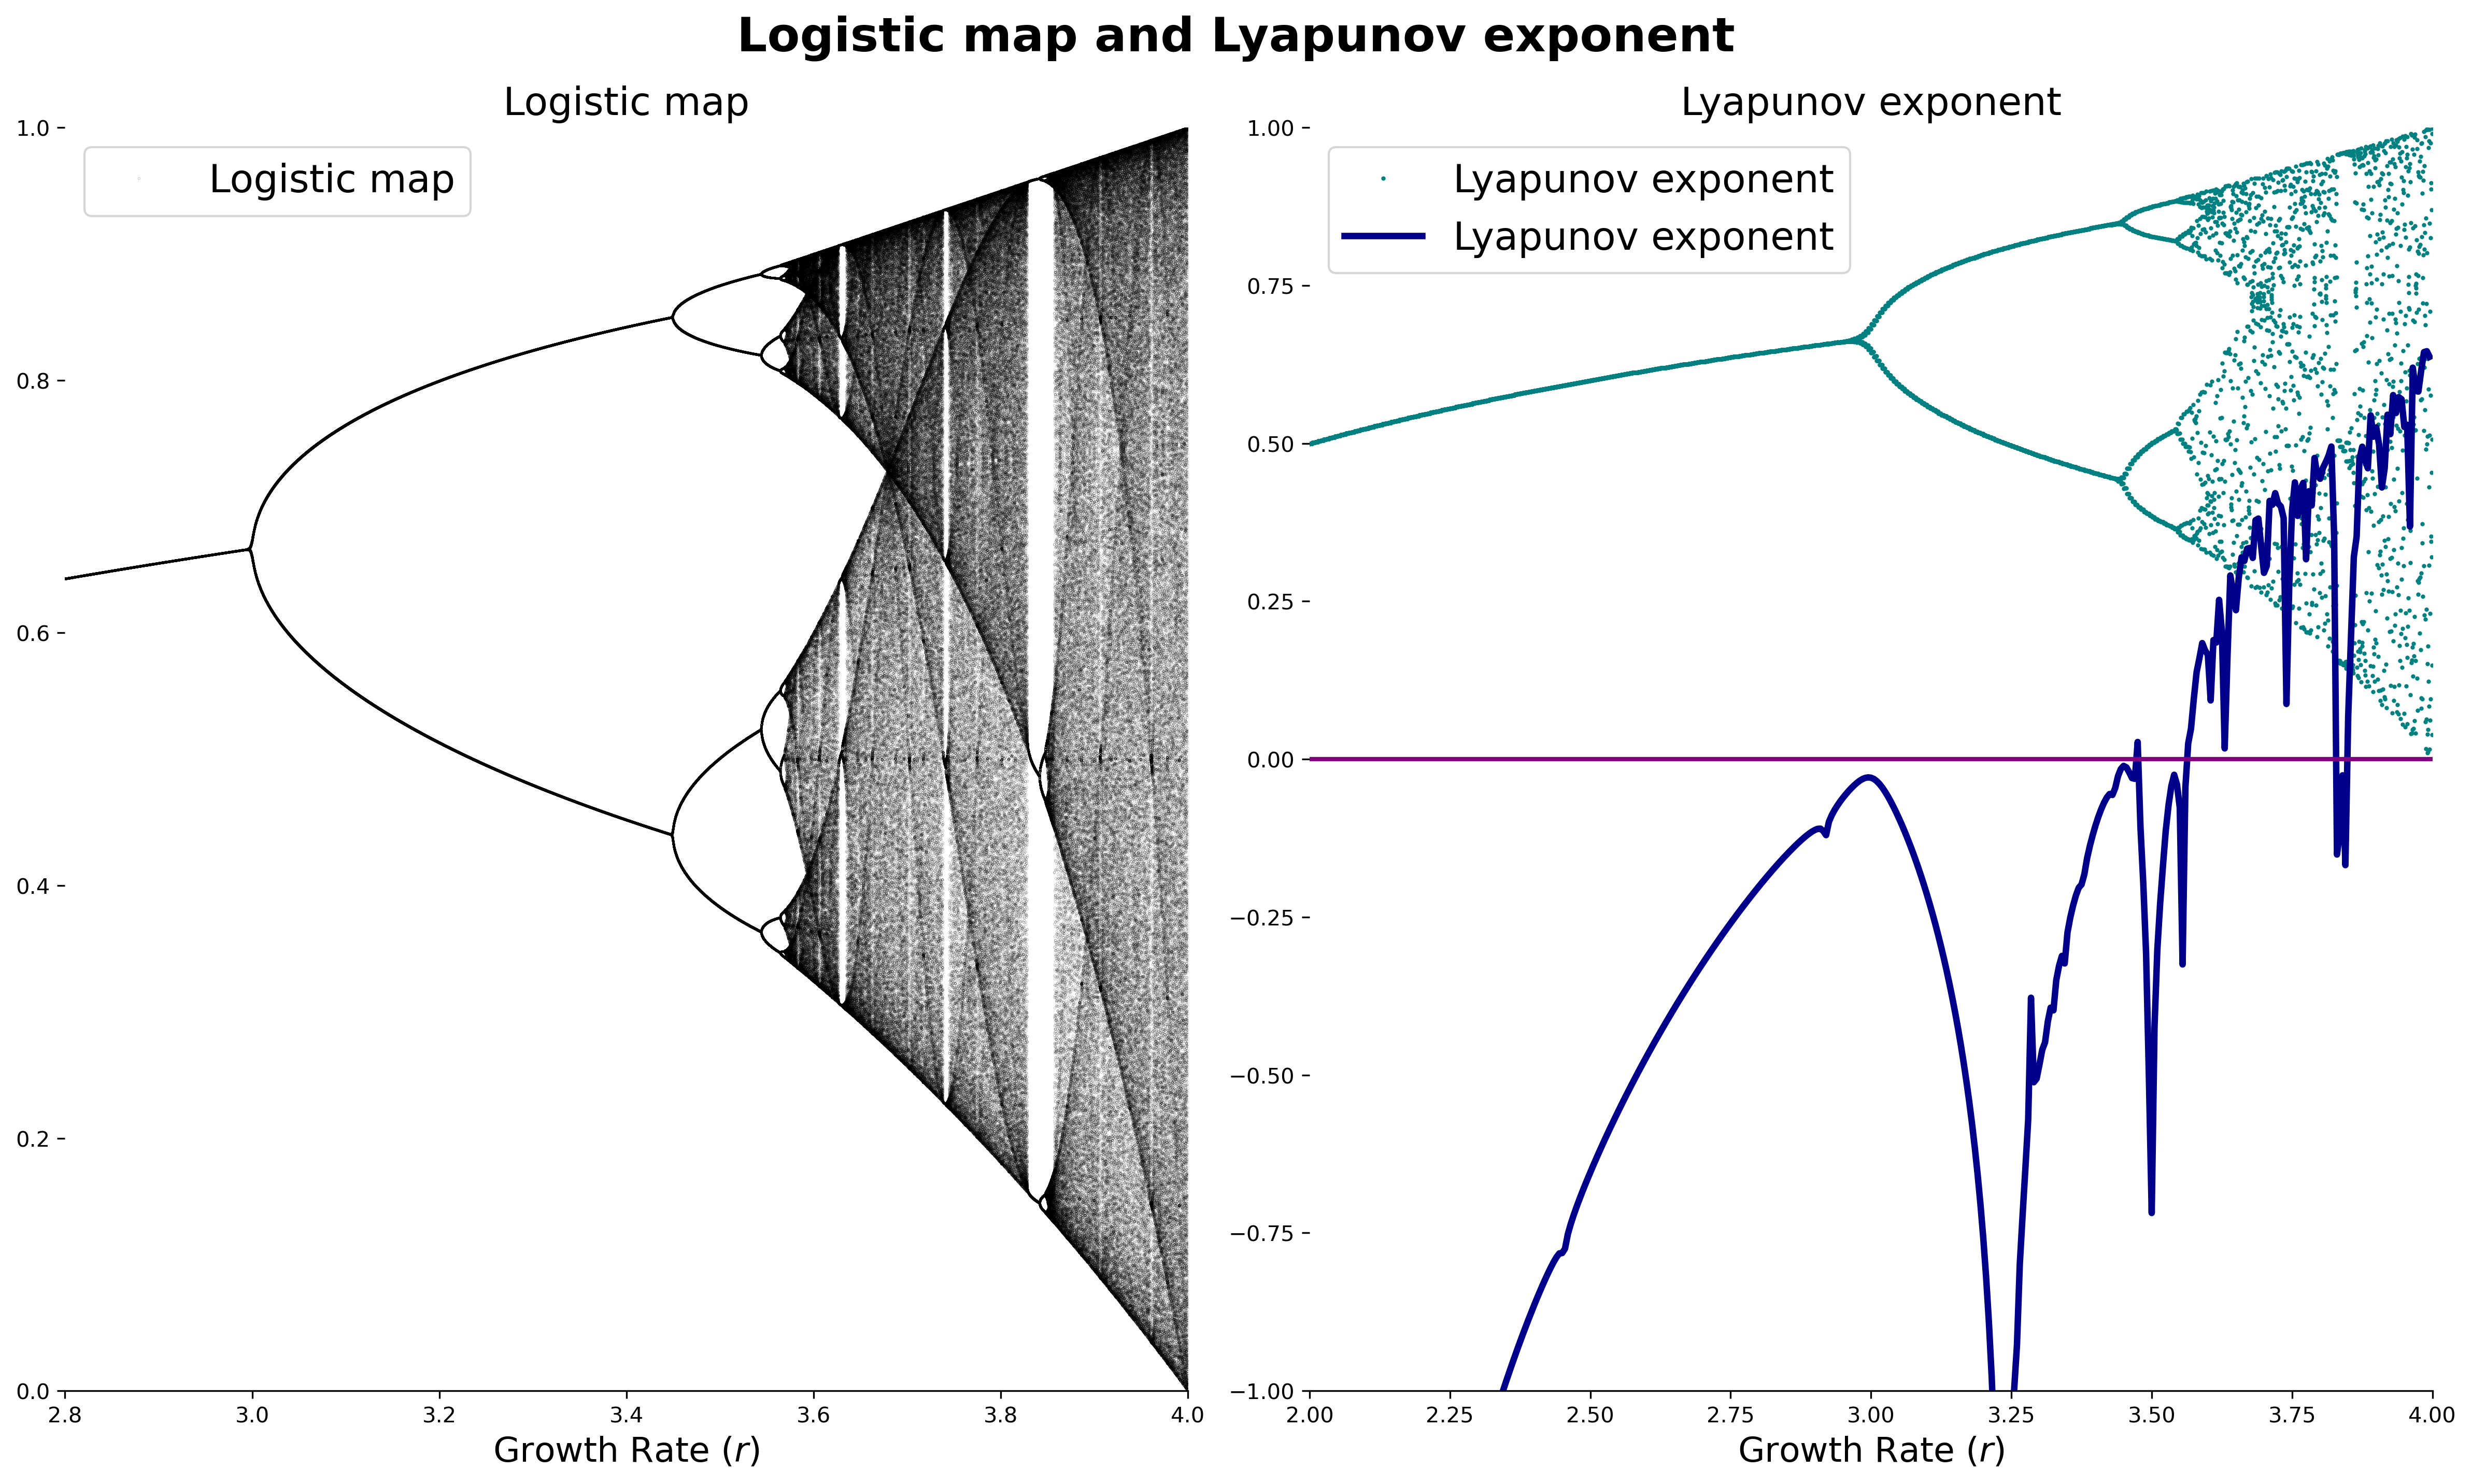

In [3]:
%%time

fig, ax = plt.subplots(1, 2, figsize=(16, 10), dpi=300)

ax = ax.ravel()

plot_params = {
    'Logistic map': {
        'setup':growth_rate(n=1000, n_iter=100, seed=0.5, dr=1e-4), 
        'color':'black', 'ms':0.05, 'xlim':[2.8, 4], 'ylim':[0, 1]},
    'Lyapunov exponent': {
        'setup':growth_rate(seed=0.99, dr=0.005),
        'color':'teal', 'ms':1.0, 'xlim':[2, 4], 'ylim':[-1, 1]}
}

for i, (label, params) in enumerate(plot_params.items()):

    maps, lambdas, rvalues = params.get('setup')

    x = np.linspace(1, 4, len(maps))
    
    ax[i].plot(x, maps, 'o', label = label, color=params.get('color'), ms=params.get('ms'))
    
    if i == 1:    
        ax[i].plot(rvalues, lambdas, '-', label = 'Lyapunov exponent', color='darkblue', linewidth = 3.0)
    
        ax[i].axhline(0, linestyle='-', color='purple', lw=2.0)
    
    ax[i].set_ylim(params.get('ylim'))
    ax[i].set_xlim(params.get('xlim'))
    ax[i].set_title(label, fontsize=18)
    ax[i].set_xlabel('Growth Rate ($r$)', fontsize=16)
    ax[i].legend(loc='upper left', fontsize=18)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Logistic map and Lyapunov exponent', weight='bold', fontsize=22)